# Basics

### Difference between supervised and unsupervised machine learning:

**Supervised**: labeled data

**Unsupervised**: not labeled. Example: conducting market segmentation.

### Difference between KNN and K-Means clustering

**K-Nearest Neighbours**  *supervised* machine learning algorith, it then classifies the points based on the *distance of the point from the nearest points*. 

**K-Means** clustering is an *unsupervised* machine learning algorithm, classifies points *into clusters* based on the *mean of the distances* between different points.

### Difference between classification and regression
**Classification**: produce *discrete results*, classification is used to classify data *into some specific categories*. Example: classifying e-mails into spam and non-spam categories. 

**Regression** analysis with *continuous data*. Example: predicting stock prices at a certain point of time.

### How to ensure that your model is not overfitting? 



### Main advantage of Naive Bayes

### Central Limit Theorem
States that, if we have independent and identically distributed (iid) random variables, regardless of their original distribution, the distribution of the sum or average of those random variables will **approximate a normal distribution as the sample size increases**.

### Probability Density Function vs Cumulative Distribution Function

The probability that the random variable falls within a specific region of the probability space is given by the integral of the density function of this variable between the lower and upper limits of that region.

A random variable $X$ has a density function $f_{X}$, where $f_{X}$ is a non-negative Lebesgue integrable function, if:

#### Density Function:

$$ P[a \leq X \leq b] = \int^b_a f_X(x)dx$$
$$\int^{\infty}_{-\infty} f_X(x)dx = 1$$


#### Cumulative Distribution Function:

If $F_{X}$ is the cumulative distribution function of $X$, then

$$P[ X \leq x] = F_X(x) = \int^x_{-\infty} f_X(y)du$$

Describes the cumulative probability that a continuous random variable is less than or equal to a given value.



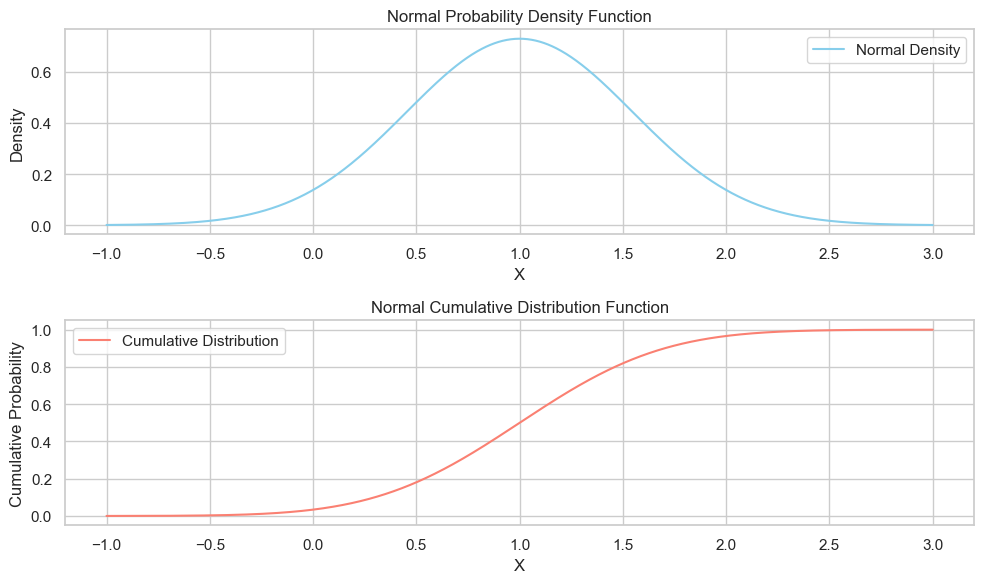

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters of the normal distribution
mean = 1
variance = 0.3  # Small variance

# Generate data for the plot
x = np.linspace(-1, 3, 1000)
pdf = norm.pdf(x, loc=mean, scale=np.sqrt(variance))
cdf = norm.cdf(x, loc=mean, scale=np.sqrt(variance))

# Plot the probability density function
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, pdf, color='skyblue', label='Normal Density')
plt.title('Normal Probability Density Function')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()

# Plot the cumulative distribution function
plt.subplot(2, 1, 2)
plt.plot(x, cdf, color='salmon', label='Cumulative Distribution')
plt.title('Normal Cumulative Distribution Function')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


## Python:

### Difference between List and Tuple
**Lists:** More flexible, content can be modified.

**Tuples:** Content cannot be changed. Useful for constant values or to prevent accidental modifications.


In [10]:
list = [1, 2, 3]
tuple = (1, 2, 3)

# Logistic Regression from excel data

Accuracy: 1.0


C:\Users\denis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

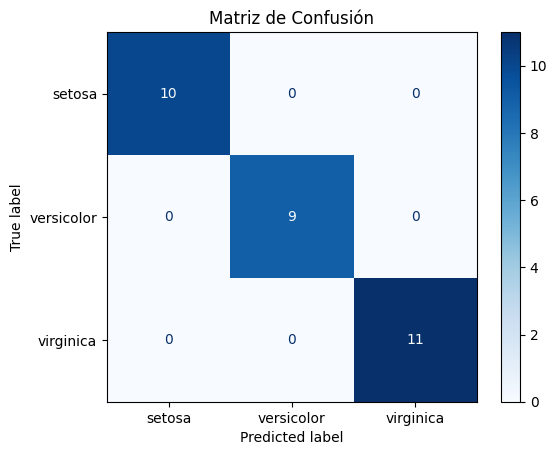

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Load data from the Excel file
## data = pd.read_excel("data.xlsx")

# Assume your features are in the 'feature1' and 'feature2' columns,
# and your target variable is in the 'target' column.

# X = data[['feature1', 'feature2']]
# y = data['target']

#Quitar una columna entera
# datos = datos.drop(labels='Nombre de la entidad', axis=1)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data to be centered in zero and a normal distribution
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión
plt.figure(figsize=(8, 6))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, display_labels=iris.target_names)
plt.title('Confusion Matrix')
plt.show()


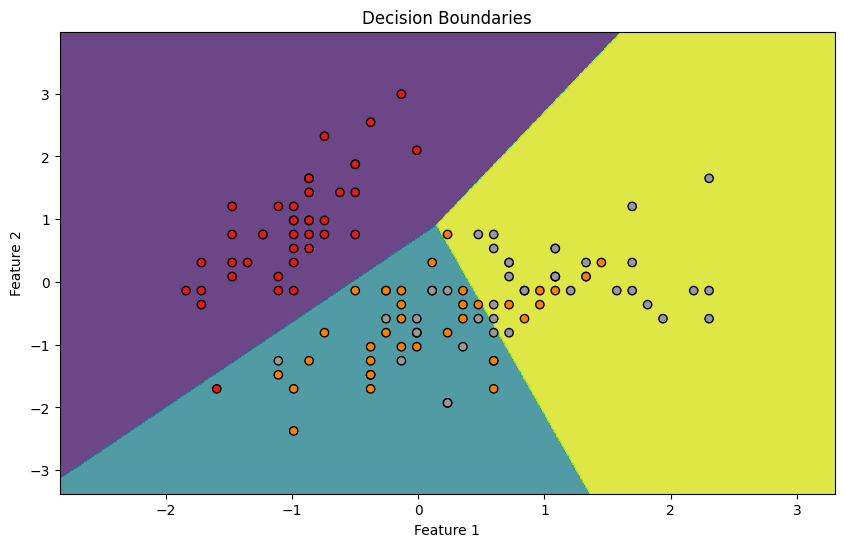

In [8]:
import numpy as np
# Visualizar las fronteras de decisión (solo para dos características)
plt.figure(figsize=(10, 6))

# Solo tomaremos las dos primeras características para visualización
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Entrena el modelo solo en dos características
model_2d = LogisticRegression(max_iter=200)
model_2d.fit(X_train_2d, y_train)

# Define los límites del gráfico
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1

# Genera puntos para la cuadrícula
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predice la clase para cada punto en la cuadrícula
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafica los resultados
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.show()
